In [ ]:
import re

def extract_drive_id(drive_url):
    # Regular expression to extract file ID from the URL
    drive_id_pattern = r'\/d\/([a-zA-Z0-9_-]+)'
    match = re.search(drive_id_pattern, drive_url)
    if match:
        return match.group(1)
    else:
        raise ValueError("Tidak dapat mengekstrak ID file dari URL")

# Contoh URL Google Drive
drive_url = 'https://drive.google.com/file/d/1hi6MbEUacSvME_dDcg-SL_i0Z0VQ73Cd/view?usp=sharing'

# Ekstraksi ID file
file_id = extract_drive_id(drive_url)
print(f"ID file adalah: {file_id}")

ID file adalah: 1hi6MbEUacSvME_dDcg-SL_i0Z0VQ73Cd


In [ ]:
import gdown
import zipfile
import os

# ID file Google Drive
file_id = '1f-Tgfvk_06yjk4wgzkPKXMB4KK-Jp-qz'
# URL untuk mengunduh file
url = f'https://drive.google.com/uc?id={file_id}&export=download'
# Nama file output
output = 'Dataset_Tomat.zip'

# Mengunduh file
gdown.download(url, output, quiet=False)

# Ekstrak file zip
try:
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Ekstraksi berhasil!")
except zipfile.BadZipFile:
    print("File yang diunduh bukan file zip atau rusak")

# Periksa apakah file sudah diekstrak
for root, dirs, files in os.walk('dataset'):
    for file in files:
        print(os.path.join(root, file))

Downloading...
From (original): https://drive.google.com/uc?id=1f-Tgfvk_06yjk4wgzkPKXMB4KK-Jp-qz&export=download
From (redirected): https://drive.google.com/uc?id=1f-Tgfvk_06yjk4wgzkPKXMB4KK-Jp-qz&export=download&confirm=t&uuid=7fdb9f31-cecf-4fa3-ae95-b0ff78348abb
To: /content/Dataset_Tomat.zip
100%|██████████| 188M/188M [00:02<00:00, 89.1MB/s]


Streaming output truncated to the last 5000 lines.
dataset/Dataset Tomat/train/Tomato___healthy/2605218e-e8bf-43d8-8b00-52058e9f0f25___RS_HL 9893.JPG
dataset/Dataset Tomat/train/Tomato___healthy/688c6cc1-16b4-4f4a-9491-afba5c8a64b6___GH_HL Leaf 347.JPG
dataset/Dataset Tomat/train/Tomato___healthy/d06e33fb-58bf-440f-9dbc-a1ceec9abaea___GH_HL Leaf 383.JPG
dataset/Dataset Tomat/train/Tomato___healthy/973c9431-f521-462d-82fa-442196087ca8___GH_HL Leaf 204.1.JPG
dataset/Dataset Tomat/train/Tomato___healthy/a4dea30d-6551-4107-bba6-1390e74b6b0b___GH_HL Leaf 261.1.JPG
dataset/Dataset Tomat/train/Tomato___healthy/89662229-ef90-4f4a-ac7a-74542f88377d___GH_HL Leaf 495.3.JPG
dataset/Dataset Tomat/train/Tomato___healthy/c4238856-a924-4621-a4eb-3f34668aa23c___RS_HL 0592.JPG
dataset/Dataset Tomat/train/Tomato___healthy/240a9583-9e6a-446d-8850-62bc23312ce9___GH_HL Leaf 312.4.JPG
dataset/Dataset Tomat/train/Tomato___healthy/f44c5128-2575-4fda-82c7-9954ead65027___GH_HL Leaf 384.JPG
dataset/Dataset Tomat/

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/Dataset Tomat/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

class_names = train_set.class_names
train_set = train_set.map(lambda x, y: (x / 255.0, y))

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/Dataset Tomat/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_set = val_set.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [ ]:
learning_rate = 0.00001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model.fit(
    train_set,
    epochs=50,
    validation_data=val_set,
)

Epoch 1/50
313/313 [==============================] - 34s 82ms/step - loss: 2.2023 - accuracy: 0.2121 - val_loss: 1.9640 - val_accuracy: 0.4760
Epoch 2/50
313/313 [==============================] - 23s 73ms/step - loss: 1.6091 - accuracy: 0.5087 - val_loss: 1.2639 - val_accuracy: 0.6350
Epoch 3/50
313/313 [==============================] - 24s 77ms/step - loss: 1.1562 - accuracy: 0.6370 - val_loss: 0.9963 - val_accuracy: 0.6950
Epoch 4/50
313/313 [==============================] - 24s 75ms/step - loss: 0.9866 - accuracy: 0.6834 - val_loss: 0.8920 - val_accuracy: 0.7120
Epoch 5/50
313/313 [==============================] - 25s 78ms/step - loss: 0.8809 - accuracy: 0.7066 - val_loss: 0.7984 - val_accuracy: 0.7410
Epoch 6/50
313/313 [==============================] - 23s 74ms/step - loss: 0.8191 - accuracy: 0.7293 - val_loss: 0.7655 - val_accuracy: 0.7480
Epoch 7/50
313/313 [==============================] - 23s 74ms/step - loss: 0.7707 - accuracy: 0.7468 - val_loss: 0.7457 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(val_set)
print(f'Test accuracy: {accuracy*100:.2f}%')
loss, accuracy = model.evaluate(train_set)
print(f'Train accuracy: {accuracy*100:.2f}%')

32/32 [==============================] - 2s 50ms/step - loss: 0.3587 - accuracy: 0.8960
Test accuracy: 89.60%
313/313 [==============================] - 18s 54ms/step - loss: 0.1034 - accuracy: 0.9735
Train accuracy: 97.35%


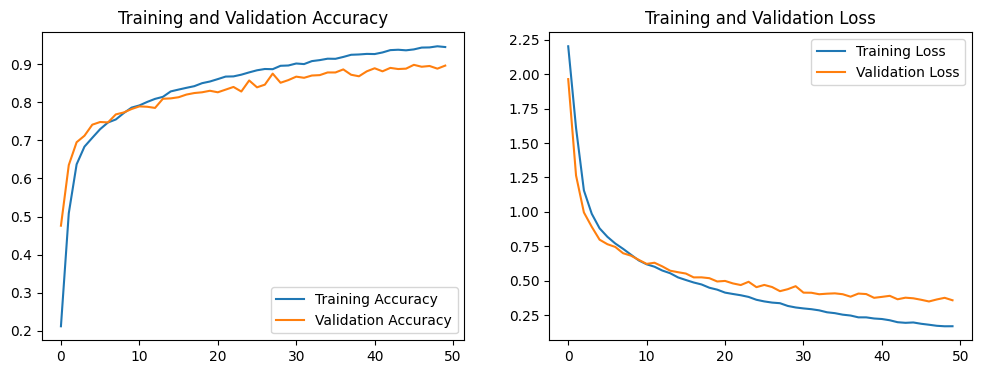

In [ ]:
# Plot hasil pelatihan
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Menyimpan model
model.save('tomato_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the Keras model
model = tf.keras.models.load_model('tomato_disease_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('tomato_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Convert model Keras ke TFJs
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras tomato_disease_model.h5 tomato_disease_model_tfjs

import os
os.listdir('tomato_disease_model_tfjs')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 505.7/589.8 MB 6.7 MB/s eta 0:00:13
ERROR: Operation cancelled by user
/bin/bash: line 1: tensorflowjs_converter: command not found


FileNotFoundError: [Errno 2] No such file or directory: 'tomato_disease_model_tfjs'

Saving tmt sept.jpg to tmt sept.jpg
1/1 [==============================] - 0s 430ms/step


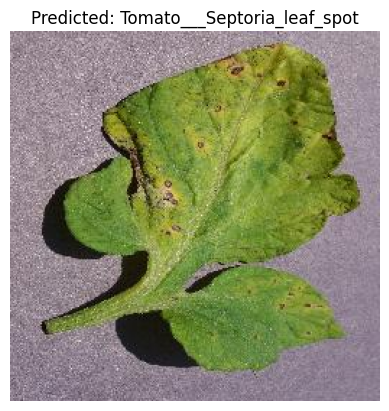

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model

# Load model yang telah disimpan
model = load_model('tomato_disease_model.h5')

# Fungsi untuk menampilkan gambar dan hasil prediksi
def predict_image(image_path, model, class_names):
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_class[0]]}')
    plt.axis('off')
    plt.show()

# Unggah gambar
uploaded = files.upload()

# Lakukan prediksi untuk setiap gambar yang diunggah
for image_path in uploaded.keys():
    predict_image(image_path, model, class_names)